# UTS (Penambangan Data A)

Senin, 17 Oktober 2022

**METODE KNN**

In [33]:
import pandas as pd
import numpy as np

In [34]:
dataset_url="https://raw.githubusercontent.com/Shintaalya/dataset/main/dataR2.csv"
data=pd.read_csv(dataset_url, index_col=0)

In [35]:
data

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,,,,,,,,,
48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...
45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2


In [36]:
#Melakukan cek banyaknya baris dan kolom pada data
data.shape

(116, 9)

In [37]:
#membuat dataframe dengan mengecualikan kolom target
X = data.drop(columns=['Classification'])
#melakukan cek dengan menampilkan data
X.head()

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Age,,,,,,,,
48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [38]:
#Target values
y = data['Classification'].values
#menampilkan target values
y[0:5]

array([1, 1, 1, 1, 1])

In [39]:
from sklearn.model_selection import train_test_split
#memisahkan dataset ke train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# Membuat KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Menyesuaikan kelas dengan data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
#Menampilkan 5 data prediksi
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 1])

In [42]:
#Cek akurasi tes data
knn.score(X_test, y_test)

0.4166666666666667

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np
#Membuat KNN model baru
knn_cv = KNeighborsClassifier(n_neighbors=3)
#mencoba model dengan cv = 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print cv score
print(cv_scores)

[0.33333333 0.47826087 0.52173913 0.47826087 0.47826087]


In [44]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.4579710144927536


In [45]:
from sklearn.model_selection import GridSearchCV
#membuat KNN Model baru
knn2 = KNeighborsClassifier()
#membuat dictionary dari semua values yang akan dilakukan tes pada n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#menggunakan gridsearch untuk melakukan tes values pada n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#menyesuaikan model pada data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [46]:
#melakukan cek performa n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [47]:
#cek mean score dari top performing value pada n_neighbors
knn_gscv.best_score_

0.5695652173913043

Text(0, 0.5, 'Mean Error')

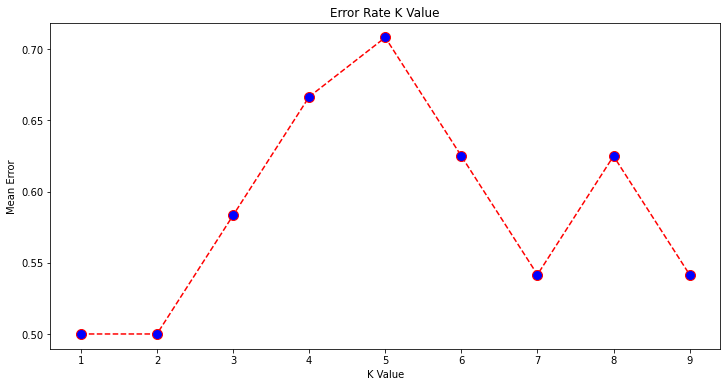

In [48]:
# menghitung error pada K values antara 2 dan 10
error = []
import matplotlib.pyplot as plt
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**Metode Decision Tree (Pohon Keputusan)**

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
%matplotlib inline

In [50]:
import warnings

warnings.filterwarnings('ignore')

In [51]:
dataset_url="https://raw.githubusercontent.com/Shintaalya/dataset/main/dataR2.csv"
df = pd.read_csv(dataset_url, index_col=0)

In [52]:
# preview dari dataset

df.head()

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,,,,,,,,,
48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 48 to 86
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             116 non-null    float64
 1   Glucose         116 non-null    int64  
 2   Insulin         116 non-null    float64
 3   HOMA            116 non-null    float64
 4   Leptin          116 non-null    float64
 5   Adiponectin     116 non-null    float64
 6   Resistin        116 non-null    float64
 7   MCP.1           116 non-null    float64
 8   Classification  116 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 9.1 KB


In [54]:
col_names = ['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']


for col in col_names:
    
    print(df[col].value_counts())   

21.367521    2
32.461911    2
27.688778    2
31.975015    2
31.250000    2
            ..
29.606767    1
34.422174    1
35.855815    1
36.790166    1
27.180000    1
Name: BMI, Length: 110, dtype: int64
92     9
90     6
87     4
77     4
103    4
97     4
83     4
82     4
101    4
86     4
85     4
93     3
102    3
89     3
98     3
84     3
95     3
100    3
88     3
94     3
105    2
99     2
112    2
134    2
131    2
70     2
78     2
106    2
196    1
119    1
152    1
108    1
104    1
91     1
118    1
128    1
139    1
199    1
76     1
60     1
75     1
201    1
114    1
116    1
80     1
79     1
74     1
110    1
96     1
138    1
Name: Glucose, dtype: int64
18.077    2
3.226     2
4.530     2
2.707     1
4.172     1
         ..
5.646     1
4.181     1
5.819     1
3.855     1
19.910    1
Name: Insulin, Length: 113, dtype: int64
0.467409    1
1.144780    1
3.071407    1
1.008511    1
2.871792    1
           ..
0.732193    1
5.091856    1
1.840410    1
2.534932    1
6.77736

In [55]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [56]:
# melakukan cek apabila terdapat missing values pada variabel

df.isnull().sum()

BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [57]:
#mendeklarasikan fitur vector dan target variabel

X = df.drop(['Classification'], axis=1)
y = df['Classification']

In [58]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [59]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((77, 8), (39, 8))

In [60]:
# melakukan cek tipe data pada X_train

X_train.dtypes

BMI            float64
Glucose          int64
Insulin        float64
HOMA           float64
Leptin         float64
Adiponectin    float64
Resistin       float64
MCP.1          float64
dtype: object

In [61]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [62]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [66]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8182
Test set score: 0.6923


In [67]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

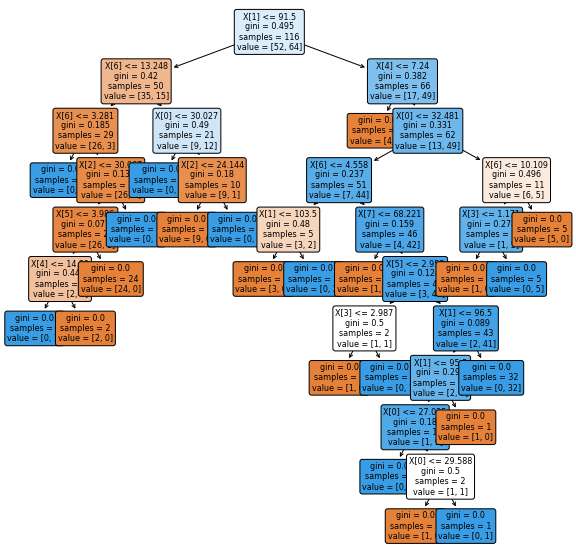

In [68]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()